# Lesson 12: EDA

In [18]:
import logging 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
url = ('https://gist.githubusercontent.com/teamtom/' + 
       '1af7b484954b2d4b7e981ea3e7a27f24/raw/' + 
       '114fb69dce56b4462a9c3a417e7402330616ad4f/' + 
       'titanic_full.csv')
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  746 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df_raw.sample(10, random_state= 2025)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
308,3,0,Cribb Mr. John Hatfield,male,44.0,0,1,371362,16.1000,NaN,S,NaN,NaN,Bournemouth England Newark NJ
311,3,0,Badt Mr. Mohamed,male,40.0,0,0,2623,7.2250,NaN,C,NaN,NaN,NaN
391,3,0,Andreasson Mr. Paul Edvin,male,20.0,0,0,347466,7.8542,NaN,S,NaN,NaN,Sweden Chicago IL
344,3,1,Asplund Miss. Lillian Gertrud,female,5.0,4,2,347077,31.3875,NaN,S,15,NaN,Sweden Worcester MA
1189,1,1,Madill Miss. Georgette Alexandra,female,15.0,0,1,24160,211.3375,B5,S,2,NaN,St Louis MO
1221,2,0,Pain Dr. Alfred,male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,Hamilton ON
898,1,0,Baumann Mr. John D,male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,New York NY
1106,1,1,Aubart Mme. Leontine Pauline,female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,Paris France
461,3,0,O'Donoghue Ms. Bridget,female,NaN,0,0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1027,3,0,Novel Mr. Mansouer,male,28.5,0,0,2697,7.2292,NaN,C,NaN,181.0,NaN


![!titanic relations](../img/titanic_relations.png)

### 2. Data preprocessing
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [5]:
df_baking = df_raw.copy()
df_baking = df_raw.drop(['boat','body','home.dest'],axis=1)

df_baking['pclass'] = df_baking['pclass'].replace({1:'A', 2:'B',3:'C'})
df_baking['pclass'] = df_baking['pclass'].astype('category')

df_baking['survived'] = df_baking['survived'].replace({1:'Yes', 0:'No'})
df_baking['survived'] = df_baking['survived'].astype('category')

df_baking['sex'] = df_baking['sex'].astype('category')

df_baking['cabin'] = df_baking['cabin'].astype('category')

df_baking['embarked'] = df_baking['embarked'].astype('category')
df_baking['travel_cabin'] = ['no' if pd.isna(x) else 'yes' for x in df_baking['cabin']]
df_baking['shared_ticket'] = df_baking['ticket'].duplicated(keep=False).map({True: 'yes', False: 'no'})
df_baking = df_baking.drop(['cabin', 'ticket','name'], axis=1)
df_baking['travel_cabin'] = df_baking['travel_cabin'].astype('category')
df_baking['shared_ticket'] = df_baking['shared_ticket'].astype('category')
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pclass         1309 non-null   category
 1   survived       1309 non-null   category
 2   sex            1309 non-null   category
 3   age            1046 non-null   float64 
 4   sibsp          1309 non-null   int64   
 5   parch          1309 non-null   int64   
 6   fare           1308 non-null   float64 
 7   embarked       1307 non-null   category
 8   travel_cabin   1309 non-null   category
 9   shared_ticket  1309 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 49.4 KB


In [7]:
df = df_baking.copy()
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,travel_cabin,shared_ticket
0,C,No,female,NaN,0,0,7.8792,Q,no,no
1,A,No,male,NaN,0,0,52.0000,S,yes,yes
2,C,No,male,27.0,1,0,14.4542,C,no,yes
3,C,Yes,male,25.0,0,0,7.7958,S,no,no
4,C,No,male,34.5,0,0,7.8292,Q,no,no
...,...,...,...,...,...,...,...,...,...,...
1304,C,No,male,2.0,4,1,29.1250,Q,no,yes
1305,C,No,male,17.0,0,0,7.8958,S,no,no
1306,C,No,female,8.0,3,1,21.0750,S,no,yes
1307,A,No,male,50.0,1,1,211.5000,C,yes,yes


### 3. Exploratory Data Analysis
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [8]:
df_train, df_test = train_test_split(df, random_state=2025,test_size=0.2,stratify=df['survived'])
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pclass         1047 non-null   category
 1   survived       1047 non-null   category
 2   sex            1047 non-null   category
 3   age            827 non-null    float64 
 4   sibsp          1047 non-null   int64   
 5   parch          1047 non-null   int64   
 6   fare           1046 non-null   float64 
 7   embarked       1045 non-null   category
 8   travel_cabin   1047 non-null   category
 9   shared_ticket  1047 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 39.7 KB


In [9]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,827.0,29.943374,14.293887,0.17,21.0000,28.0,38.750,80.0000
sibsp,1047.0,0.496657,1.051148,0.00,0.0000,0.0,1.000,8.0000
parch,1047.0,0.377268,0.876711,0.00,0.0000,0.0,0.000,9.0000
fare,1046.0,33.462432,51.891862,0.00,7.8958,14.4,31.275,512.3292


,count,unique,top,freq
pclass,1047,3,C,565
survived,1047,2,No,647
sex,1047,2,male,678
embarked,1045,3,S,738
travel_cabin,1047,2,no,813
shared_ticket,1047,2,no,570


<function matplotlib.pyplot.show(close=None, block=None)>

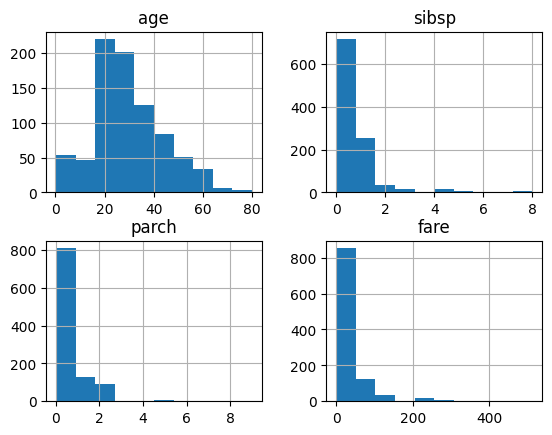

In [10]:
df_train.hist() #Analisis univariado
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

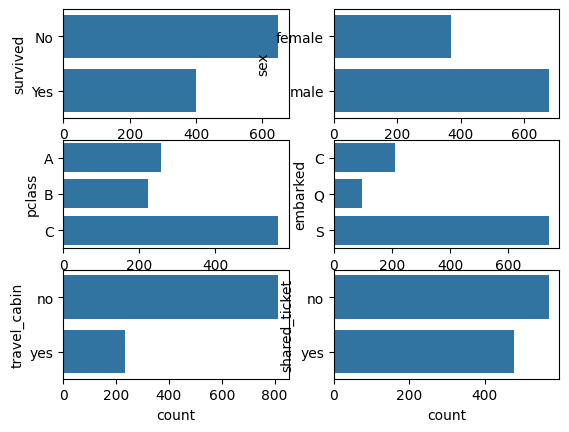

In [11]:
fig, ax = plt.subplots(3,2) #Analisis univariado de variables categoricas
sns.countplot(data=df_train, y='survived',ax=ax[0,0])
sns.countplot(data=df_train, y='sex',ax=ax[0,1])
sns.countplot(data=df_train, y='pclass',ax=ax[1,0])
sns.countplot(data=df_train, y='embarked',ax=ax[1,1])
sns.countplot(data=df_train, y='travel_cabin',ax=ax[2,0])
sns.countplot(data=df_train, y='shared_ticket',ax=ax[2,1])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

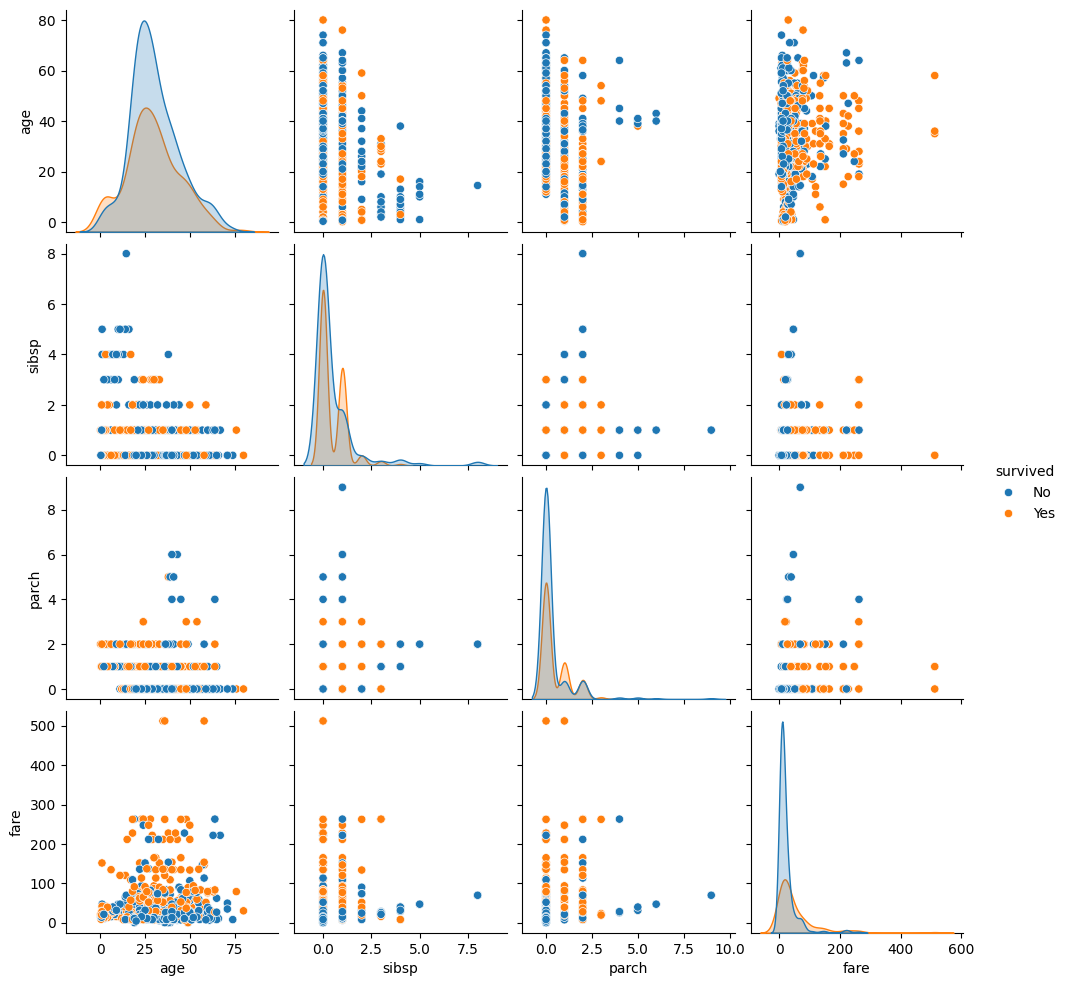

In [12]:
sns.pairplot(data=df_train, hue='survived') #Analisis bivariado(Una variable contra otra)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

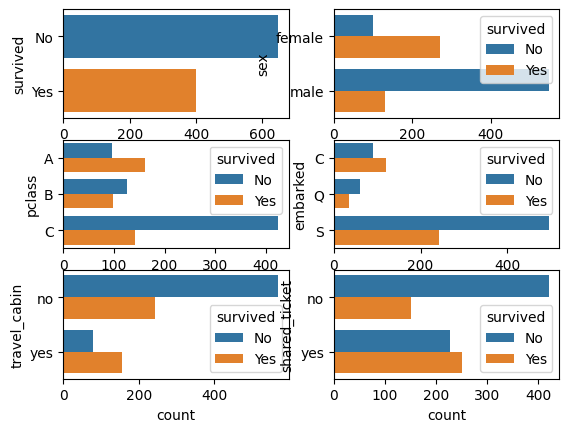

In [13]:
fig, ax = plt.subplots(3,2) #Analisis bivariado contra valor efecto (survived)
sns.countplot(data=df_train, y='survived', hue = "survived",ax=ax[0,0])
sns.countplot(data=df_train, y='sex',hue = "survived",ax=ax[0,1])
sns.countplot(data=df_train, y='pclass',hue = "survived",ax=ax[1,0])
sns.countplot(data=df_train, y='embarked',hue = "survived",ax=ax[1,1])
sns.countplot(data=df_train, y='travel_cabin',hue = "survived",ax=ax[2,0])
sns.countplot(data=df_train, y='shared_ticket',hue = "survived",ax=ax[2,1])

plt.show

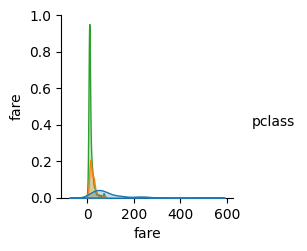

In [14]:
sns.pairplot(data=df_train[['fare','pclass']], hue='pclass')
plt.show()

### Lesson 13: Machine Learnig

In [17]:
x_train = df_train.drop(['survived'], axis=1)
y_train = df_train['survived']
display(x_train)
display(y_train)

,pclass,sex,age,sibsp,parch,fare,embarked,travel_cabin,shared_ticket
0,C,male,31.0,3,0,18.0000,S,no,yes
1,A,male,36.0,0,0,26.2875,S,yes,no
2,C,male,NaN,0,0,8.0500,S,no,no
3,A,female,76.0,1,0,78.8500,S,yes,yes
4,C,male,32.0,0,0,7.9250,S,no,no
...,...,...,...,...,...,...,...,...,...
1042,B,male,23.0,0,0,15.0458,C,no,no
1043,B,male,19.0,0,0,10.5000,S,no,no
1044,C,male,20.0,0,0,4.0125,C,no,no
1045,B,male,40.0,0,0,13.0000,S,no,no


0        No
1       Yes
2        No
3       Yes
4        No
       ... 
1042     No
1043     No
1044     No
1045     No
1046     No
Name: survived, Length: 1047, dtype: category
Categories (2, object): ['No', 'Yes']

In [19]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_train_enc

array([0, 1, 0, ..., 0, 0, 0], shape=(1047,))

In [20]:
num_cols = x_train.select_dtypes('number').columns
cat_cols = x_train.select_dtypes('category')
num_proc = Pipeline(steps=[('imputer', SimpleImputer(strategy= 'mean'))]) #imputo por la media
cat_proc = Pipeline(steps=[('imputer', SimpleImputer(strategy= 'most_frequent')),
                           ('OneHotEncoder', OneHotEncoder(drop='first'))])
processor = ColumnTransformer(transformers=[
    ('cat',cat_proc, cat_cols), ('num', num_proc, num_cols)
])

In [21]:
clf_lr = Pipeline(steps = [
    ('proc', processor),('lreg', LogisticRegression)
])

In [22]:
clf_lr.fit(x_train, y_train_enc)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
y_hat = clf_lr.predict(x_train)

In [ ]:
y_hat 